MAE: 1.0907172995780592
RMSE: 2.0530071251648145
R2 Score: 0.7263621600379117


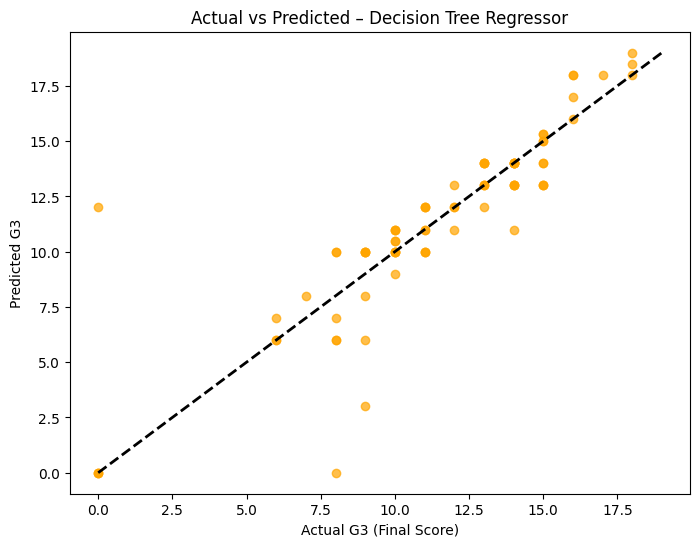

In [ ]:
import pandas as pd

df = pd.read_csv("C:/Users/navad/OneDrive/Downloads/student_data.csv")
df['sex'] = df['sex'].map({'F': 0, 'M': 1})
df['schoolsup'] = df['schoolsup'].map({'no': 0, 'yes': 1})
df = pd.get_dummies(df, drop_first=True)

important_features = [
    'studytime',
    'failures',
    'absences',
    'G1',
    'G2'
]

X=df[important_features]
X=df.drop('G3', axis=1)
y=df['G3']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(random_state=42)
model.fit(X_train,y_train)


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)



print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)
from matplotlib import pyplot as plt



from sklearn.model_selection import GridSearchCV
param_grid={
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}
dt=DecisionTreeRegressor(random_state=42)
grid_search=GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_dt = grid_search.best_estimator_
print(grid_search.best_params_)

y_pred_tuned=best_dt.predict(X_test)
tuned_mae = mean_absolute_error(y_test, y_pred_tuned)
tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
tuned_r2 = r2_score(y_test, y_pred_tuned)


print("Tuned Decision Tree Results")
print("MAE:", tuned_mae)
print("RMSE:", tuned_rmse)
print("R2 Score:",tuned_r2)

# feature_names = X.columns

# print("\nEnter new student details:")
# new_data = {}

# for col in feature_names:
#     val = float(input(f"{col}: "))
#     new_data[col] = val

# new_df = pd.DataFrame([new_data])

# predicted_g3 = model.predict(new_df)
# print("\n📊 Predicted Final Score (G3):", round(predicted_g3[0], 2))


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_tuned, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Actual G3 Scores")
plt.ylabel("Predicted G3 Scores")
plt.title("Actual vs Predicted Values (Tuned Decision Tree)")
plt.show()